In [5]:
%matplotlib inline

import scipy 
import matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

from matplotlib import rc
from matplotlib import cm

import OpticalDesign as OD
import ModelDesign as MODEL

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

## Datas Paper

In [6]:
data    = OD.load_datas()
recdata = OD.fit_parameters(X=data.x,Y=data.y)

#### Calibrated datas

Spatial terms are given in centimeters and angles in deg. Intensity in dB.

In [11]:
data.head(10)

,I,phi,theta,x,y,z
0,50.465352,26.3,9.37,-960.0,-388.0,105.5400
1,50.628139,0.0,9.00,-960.0,0.0,108.4490
2,50.741191,5.5,7.88,-840.0,-194.0,103.8950
3,51.040159,16.3,6.12,-600.0,-194.0,80.2923
4,51.040159,-16.3,6.12,-600.0,194.0,80.2923
5,51.217924,38.0,5.70,-488.0,-388.0,85.2500
6,51.363391,-26.5,3.85,-360.0,194.0,45.8000
7,51.351143,58.5,4.00,-240.0,-388.0,24.0000
8,51.476606,-55.0,2.00,-120.0,194.0,-11.0000
9,51.640523,0.0,0.00,0.0,0.0,0.0000


#### Reconstrution of data coordinates from regression linear model using x and y coordinates

In [12]:
recdata.head(10)

,phi,theta,x,y,z
0,22.823809,9.368739,-960.0,-388.0,94.530165
1,-0.502988,8.523802,-960.0,0.0,104.055076
2,11.397182,8.106884,-840.0,-194.0,106.266264
3,15.162002,6.007373,-600.0,-194.0,79.967156
4,-15.162007,6.007364,-600.0,194.0,79.967167
5,26.887975,5.707265,-488.0,-388.0,61.005874
6,-29.245060,3.888940,-360.0,194.0,41.664093
7,46.418630,3.887295,-240.0,-388.0,29.116135
8,-64.688084,2.367534,-120.0,194.0,11.784843
9,-0.000008,-0.000003,0.0,0.0,0.000003


Comparation betwenn values in module.

/home/marins/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


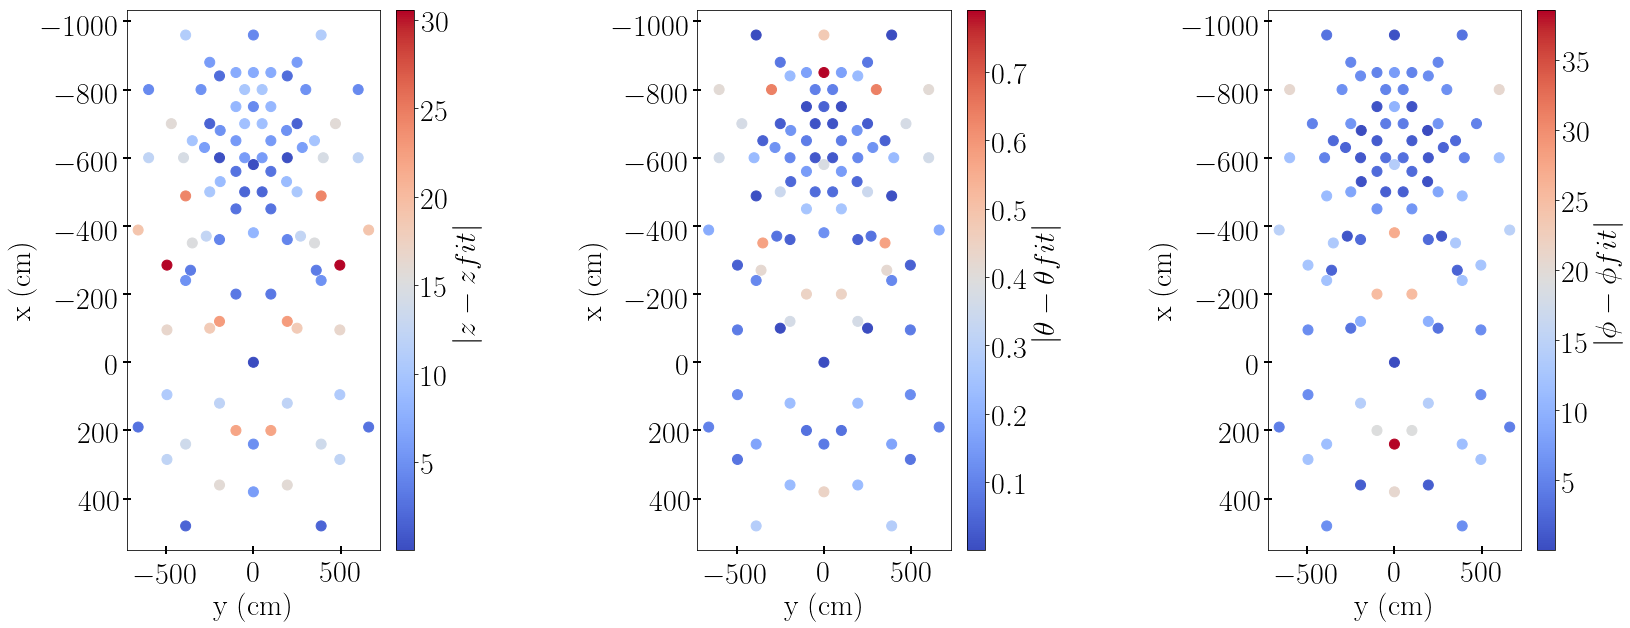

In [7]:
fig = plt.Figure()
grid = plt.GridSpec(1,3,top=2,right=3.5, wspace=0.8 )

for i,s in enumerate(["z","theta","phi"]):
    ax = plt.subplot(grid[0,i])
    if s=="phi":
        im =ax.scatter(data.y,data.x, c=np.absolute(data[s].abs()-recdata[s].abs()), cmap=cm.coolwarm, s=100)
    else:
        im =ax.scatter(data.y,data.x, c=np.absolute(data[s]-recdata[s]), cmap=cm.coolwarm, s=100)
    ax.tick_params(axis="both", direction='inout',     length=8, width=2, colors='black', 
                   labelsize=30,   grid_color='r', grid_alpha=0)
    ax.tick_params(                    labelsize=30)
    ax.set_ylabel(       "x (cm)",     fontsize=30)
    ax.set_xlabel(       "y (cm)",     fontsize=30)
    plt.gca().invert_yaxis()
    cbar = fig.colorbar(im, ax=ax, shrink=1, aspect=30)
    if s=="z":
        cbar.set_label(r"$| {0} - {1}fit |$".format(s,s), size=30)
    else:
        cbar.set_label(r"$| \{0} - \{1} fit |$".format(s,s), size=30)
    cbar.ax.tick_params( axis="both",  labelsize=30)    

In [8]:
for i,s in enumerate(["z","theta","phi"]):
    if s=="phi":
        print("sigma {0}: {1:.2f}".format(s,np.std(recdata[s].abs() - data[s].abs())))
    else:
        print("sigma {0}: {1:.2f}".format(s,np.std(recdata[s]-data[s])))

sigma z: 11.63
sigma theta: 0.25
sigma phi: 10.28


# Models design

Below, it is showed the four arrangement horn models studied by BINGO team for the BINGO Optical Design.

### Triple Rectangular

First line are showed arrangement without displacement of the center horn (Np=0).

Second line are showed arrangement with one displacement of the center horn  of $\pm 15$cm (displacement=15.) each moviment (Np=1).

Third line are showed arrangement with two displacement of the center horn  of $\pm 15$cm (displacement=15.) each moviment (Np=2).

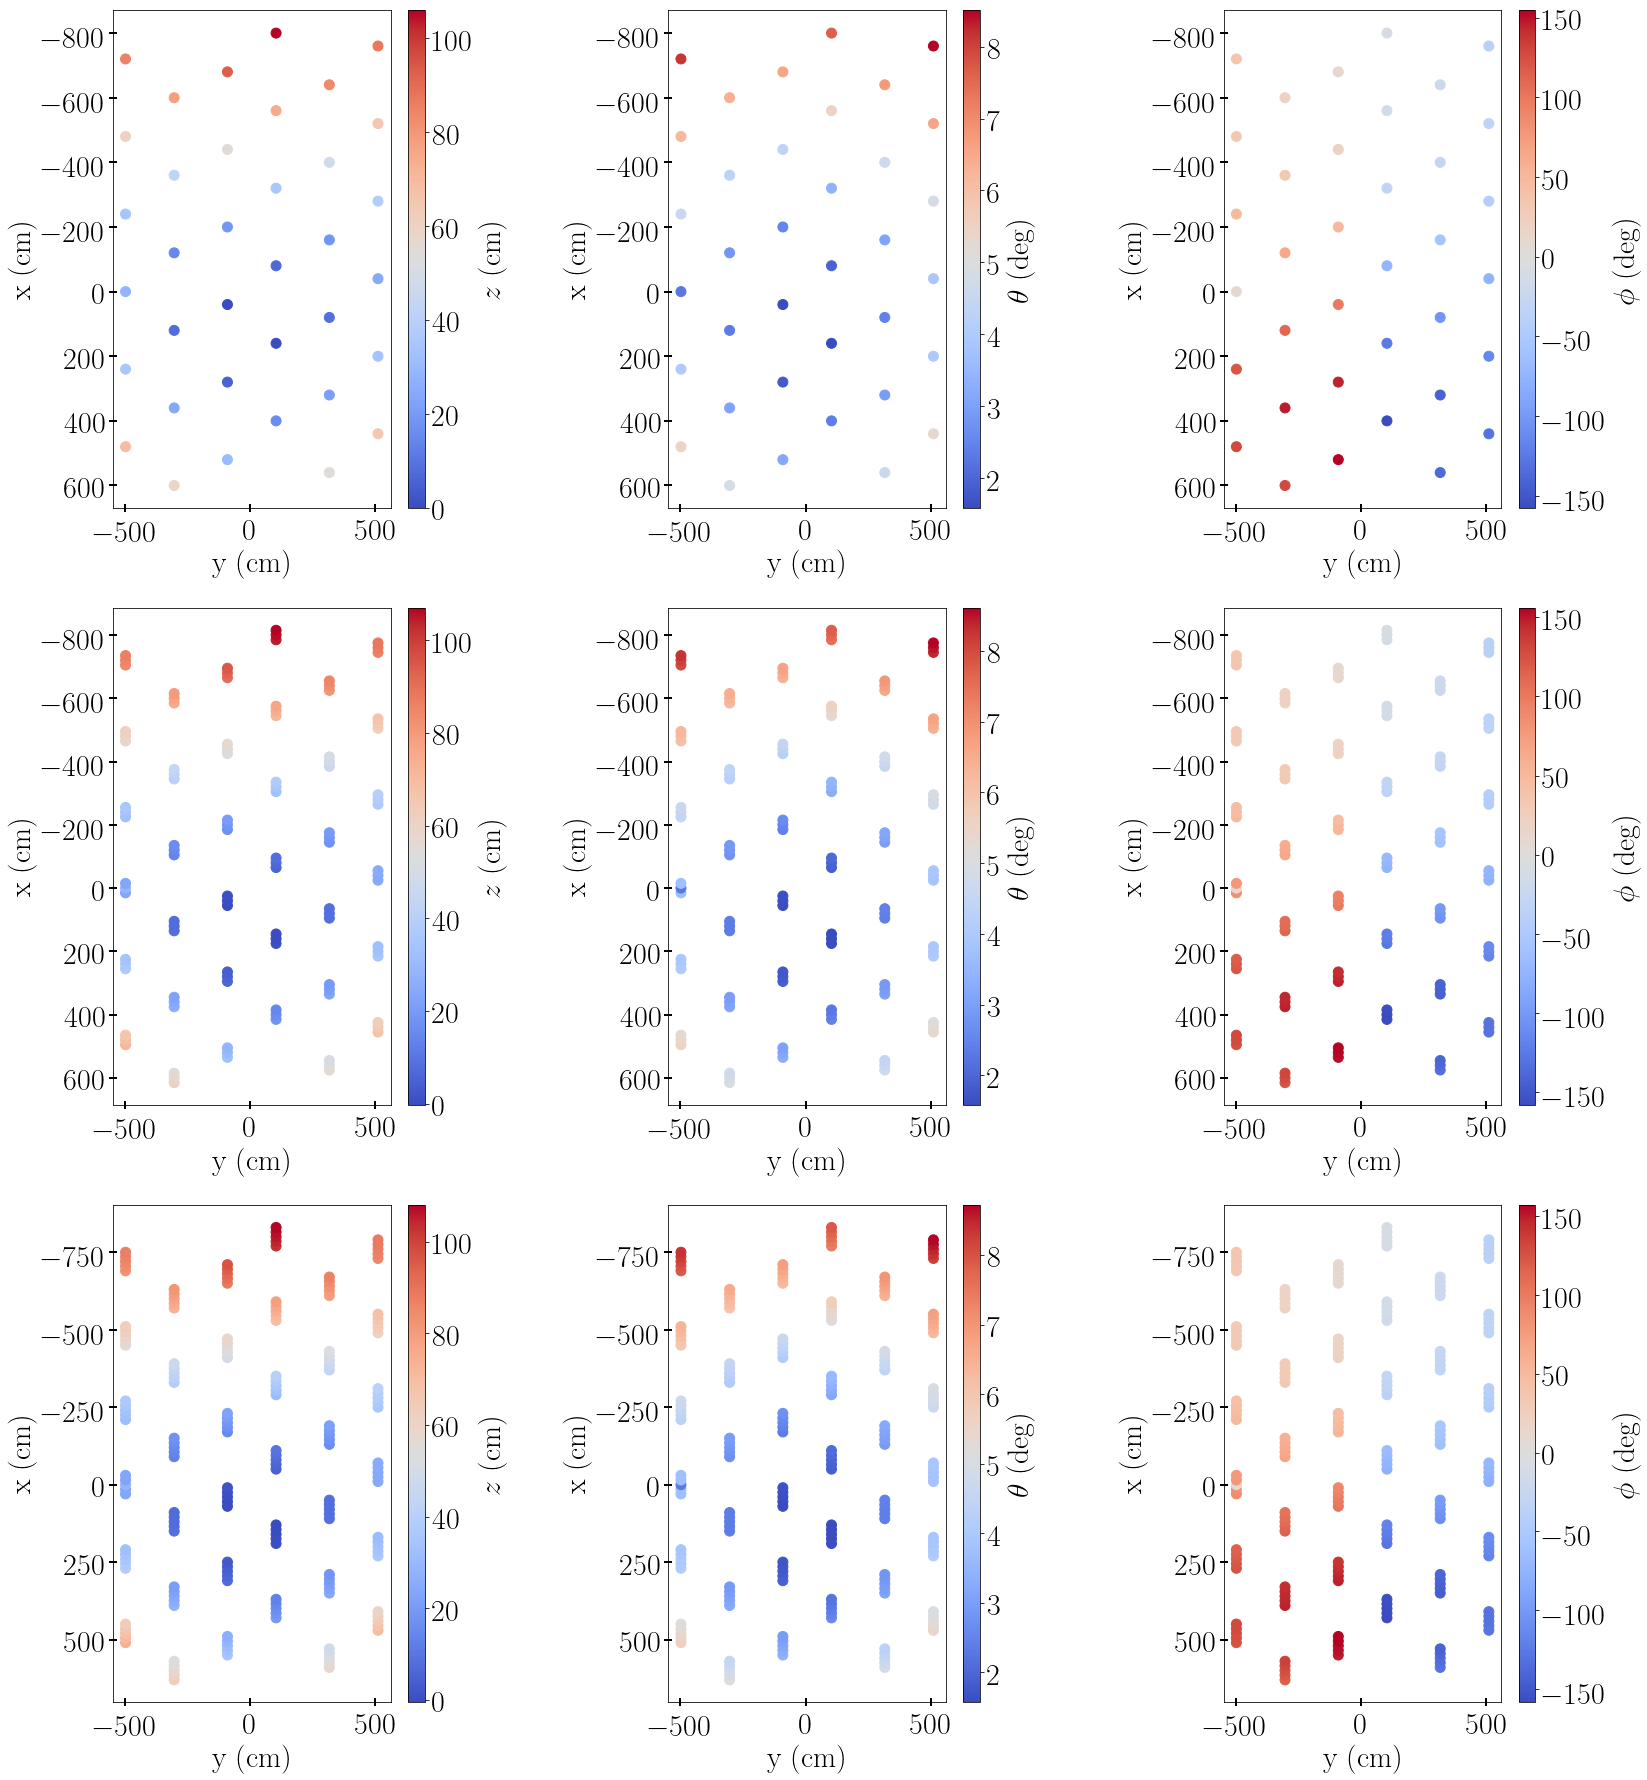

In [29]:
for i in [0,1,2]:
    TR = MODEL.TripleRectangular(Np=i,displacement=15.)

    X = []
    Y = []
    for si in np.arange(TR.shape[1])+1:
        X = np.hstack((X,TR["col"+str(si)].x))
        Y = np.hstack((Y,TR["col"+str(si)].y))
        del si

    TR_fit = OD.fit_parameters(X,Y)

    fig = plt.Figure()
    grid = plt.GridSpec(3,3,top=6,right=3.5, wspace=0.6 )
    
    for j,s in enumerate(["z","theta","phi"]):
        ax = plt.subplot(grid[i,j])

        im = ax.scatter(TR_fit.y,TR_fit.x, c=TR_fit[s], cmap=cm.coolwarm, s=100)
        ax.tick_params(axis="both", direction='inout',length=8,width=2, colors='black', 
                       labelsize=30, grid_color='r', grid_alpha=0)
        ax.tick_params(                    labelsize=30)
        ax.set_ylabel(       "x (cm)",     fontsize=30)
        ax.set_xlabel(       "y (cm)",     fontsize=30)
        plt.gca().invert_yaxis()
        cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
        
        if s=="z":
            cbar.set_label(r"${}$\ (cm)".format(s), size=30)
        else:
            cbar.set_label(r"$\{}$\ (deg)".format(s), size=30)
        
        cbar.ax.tick_params( axis="both",  labelsize=30)
    ;

### Double Rectangular

First line are showed arrangement without displacement of the center horn (Np=0).

Second line are showed arrangement with one displacement of the center horn  of $\pm 15$cm (displacement=15.) each moviment (Np=1).

Third line are showed arrangement with two displacement of the center horn  of $\pm 15$cm (displacement=15.) each moviment (Np=2).

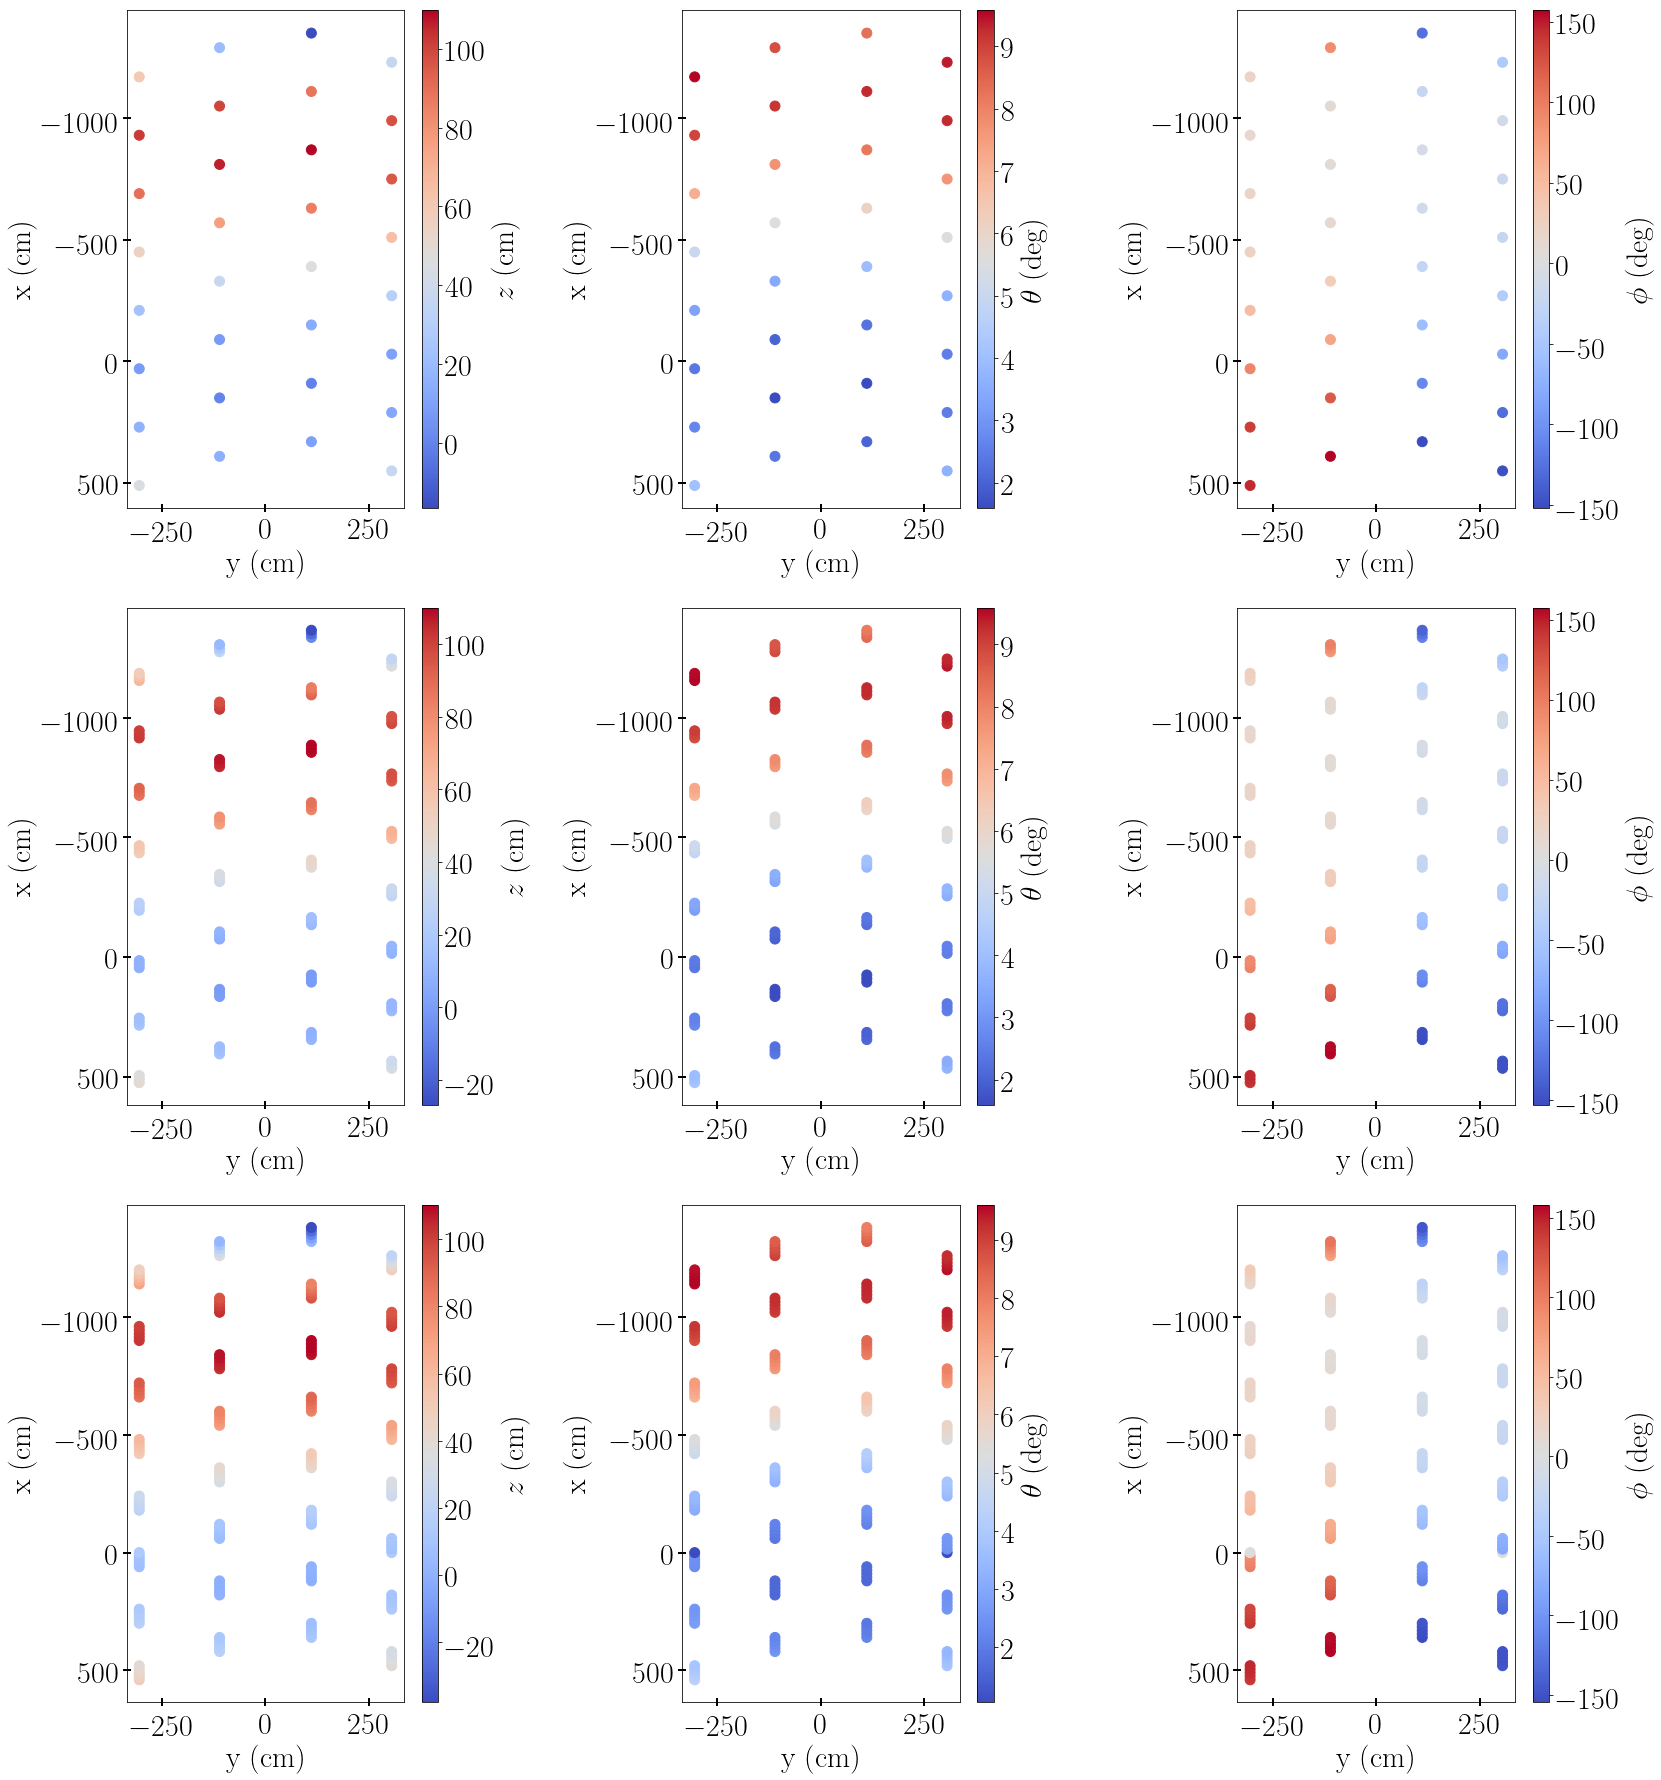

In [9]:
for i in [0,1,2]:
    DR = MODEL.DoubleRectangular(Np=i,displacement=15.,including_addition_horns=True) #Including four additional horns

    X = []
    Y = []
    for si in np.arange(DR.shape[1])+1:
        X = np.hstack((X,DR["col"+str(si)].x))
        Y = np.hstack((Y,DR["col"+str(si)].y))
        del si

    DR_fit = OD.fit_parameters(X,Y)

    fig = plt.Figure()
    grid = plt.GridSpec(3,3,top=6,right=3.5, wspace=0.6 )
    
    for j,s in enumerate(["z","theta","phi"]):
        ax = plt.subplot(grid[i,j])

        im = ax.scatter(DR_fit.y,DR_fit.x, c=DR_fit[s], cmap=cm.coolwarm, s=100)
        ax.tick_params(axis="both", direction='inout',length=8,width=2, colors='black', 
                       labelsize=30, grid_color='r', grid_alpha=0)
        ax.tick_params(                    labelsize=30)
        ax.set_ylabel(       "x (cm)",     fontsize=30)
        ax.set_xlabel(       "y (cm)",     fontsize=30)
        plt.gca().invert_yaxis()
        cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
                
        if s=="z":
            cbar.set_label(r"${}$\ (cm)".format(s), size=30)
        else:
            cbar.set_label(r"$\{}$\ (deg)".format(s), size=30)
            
        cbar.ax.tick_params( axis="both",  labelsize=30)
    ;

### Rectangular

First line are showed arrangement without displacement of the center horn (Np=0).

Second line are showed arrangement with one displacement of the center horn  of $\pm 15$cm (displacement=15.) each moviment (Np=1).

Third line are showed arrangement with two displacement of the center horn  of $\pm 15$cm (displacement=15.) each moviment (Np=2).

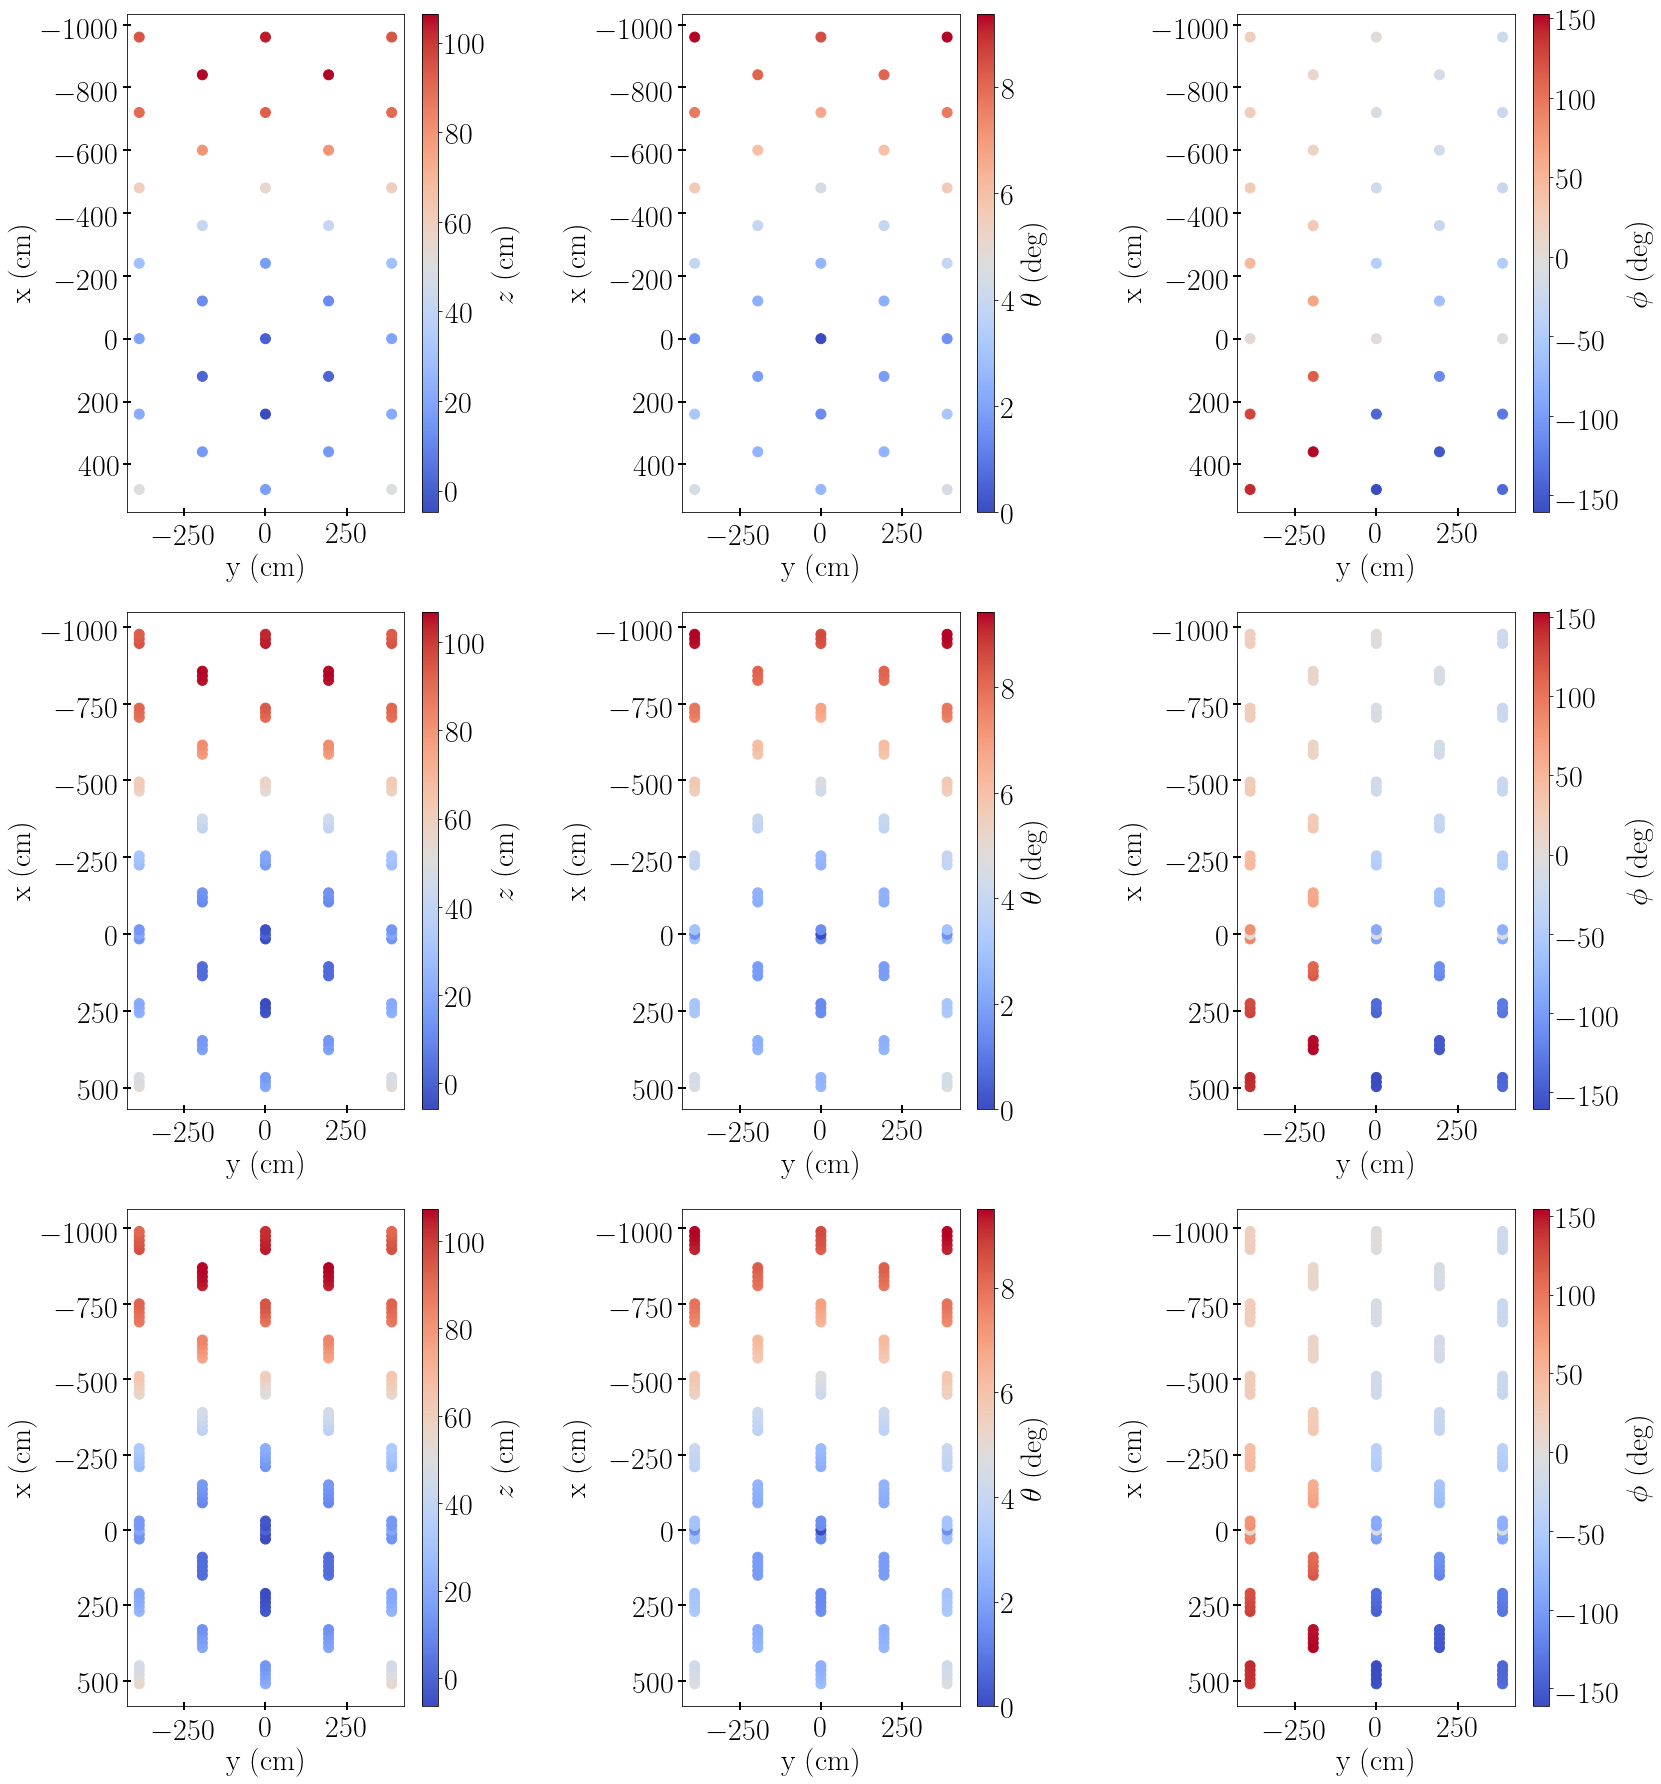

In [31]:
for i in [0,1,2]:
    R = MODEL.Rectangular(Np=i,displacement=15.)

    X = []
    Y = []
    for si in np.arange(R.shape[1])+1:
        X = np.hstack((X,R["col"+str(si)].x))
        Y = np.hstack((Y,R["col"+str(si)].y))
        del si

    R_fit = OD.fit_parameters(X,Y)

    fig = plt.Figure()
    grid = plt.GridSpec(3,3,top=6,right=3.5, wspace=0.6 )
    
    for j,s in enumerate(["z","theta","phi"]):
        ax = plt.subplot(grid[i,j])

        im = ax.scatter(R_fit.y,R_fit.x, c=R_fit[s], cmap=cm.coolwarm, s=100)
        ax.tick_params(axis="both", direction='inout',length=8,width=2, colors='black', 
                       labelsize=30, grid_color='r', grid_alpha=0)
        ax.tick_params(                    labelsize=30)
        ax.set_ylabel(       "x (cm)",     fontsize=30)
        ax.set_xlabel(       "y (cm)",     fontsize=30)
        plt.gca().invert_yaxis()
        cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
        
        if s=="z":
            cbar.set_label(r"${}$\ (cm)".format(s), size=30)
        else:
            cbar.set_label(r"$\{}$\ (deg)".format(s), size=30)
        
        cbar.ax.tick_params( axis="both",  labelsize=30)
    ;

### Hexagonal

The horns are fixed in this arragement.

''

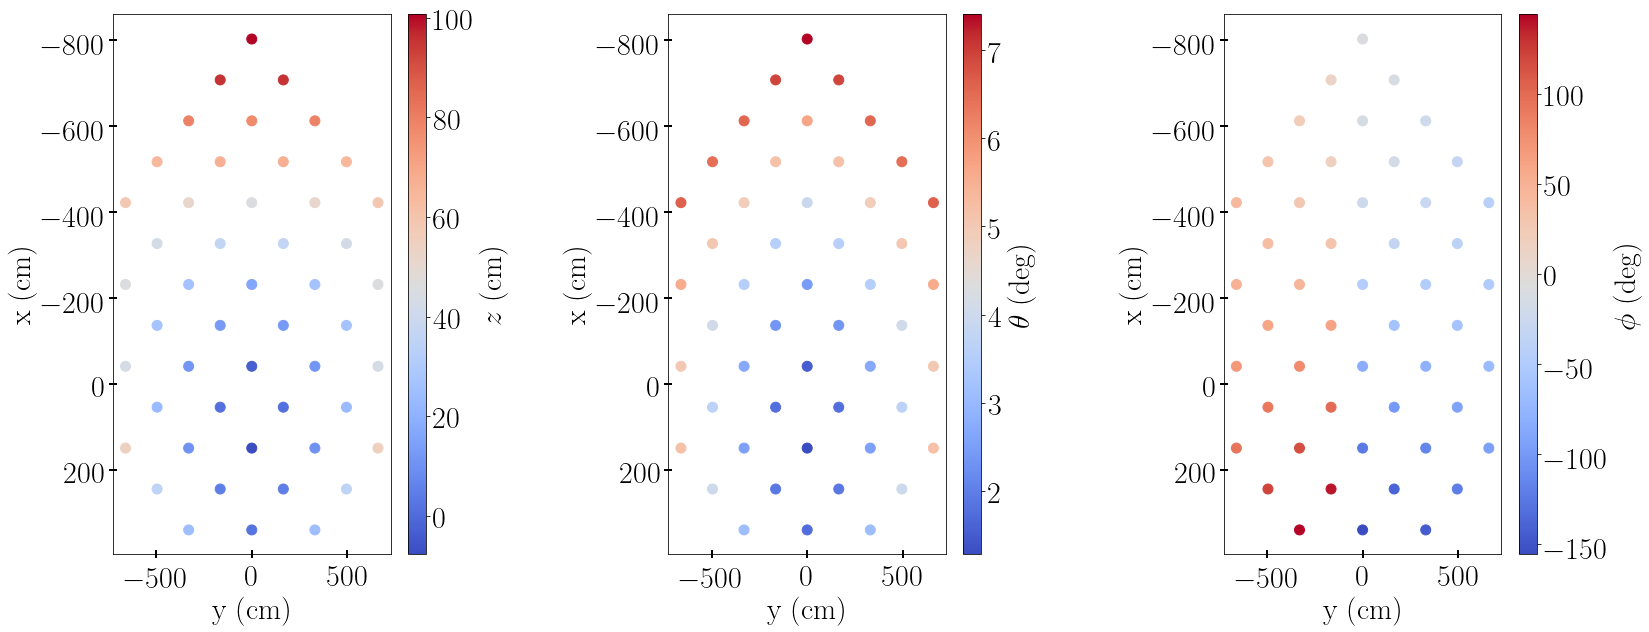

In [32]:
H = MODEL.Hexagonal()

H_fit = OD.fit_parameters(H.x,H.y)

fig = plt.Figure()
grid = plt.GridSpec(1,3,top=2,right=3.5, wspace=0.6 )
    
for j,s in enumerate(["z","theta","phi"]):
    ax = plt.subplot(grid[0,j])

    im = ax.scatter(H_fit.y,H_fit.x, c=H_fit[s], cmap=cm.coolwarm, s=100)
    ax.tick_params(axis="both", direction='inout',length=8,width=2, colors='black', 
                       labelsize=30, grid_color='r', grid_alpha=0)
    ax.tick_params(                    labelsize=30)
    ax.set_ylabel(       "x (cm)",     fontsize=30)
    ax.set_xlabel(       "y (cm)",     fontsize=30)
    plt.gca().invert_yaxis()
    cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
        
    if s=="z":
        cbar.set_label(r"${}$\ (cm)".format(s), size=30)
    else:
        cbar.set_label(r"$\{}$\ (deg)".format(s), size=30)
        
    cbar.ax.tick_params( axis="both",  labelsize=30)
;